In [420]:
# 1. Understand the problem - What sort of people were more likely to survive


In [421]:
# 2. Acquire data

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TITANIC_PATH = os.path.join("datasets", "titanic")

def load_titanic_train_data():
    csv_path = os.path.join(TITANIC_PATH, "train.csv")
    return pd.read_csv(csv_path)

def load_titanic_test_data():
    csv_path = os.path.join(TITANIC_PATH, "test.csv")
    return pd.read_csv(csv_path)

train_data = load_titanic_train_data()
test_data = load_titanic_test_data()
combined_data = [train_data, test_data]

In [422]:
train_data.info() # Cabin, Age and Embarked are missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [423]:
test_data.info()  # Cabin, Age and Fare are missing value(s)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [424]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [425]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [426]:
corr_matrix = train_data.corr()
corr_matrix["Survived"].sort_values(ascending = False)
# There is a strong correlation between survival rate and Pclass. Sex is not counted since it is an object(string) not a numerical value, we may want to create a numerical value out of two unique values in Sex column
# Ticket, Cabin, PassangerId and Name may not be relevant to survival rate since Tickets feature has high ration of duplicates, Cabin feature is highly incomplete, Name/PassangerId likely may not contribute to survival rate

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [427]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False) # Pclass 1 more likely to survive (higher socioeconomic class people)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [428]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False) # Female more likely to survive - 74% against almost 19% male survival

,Sex,Survived
0,female,0.742038
1,male,0.188908


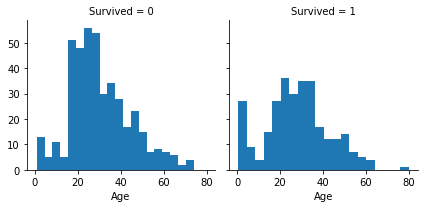

In [429]:
import seaborn as sns

age_survival = sns.FacetGrid(train_data, col = "Survived")
age_survival.map(plt.hist, 'Age', bins = 20)

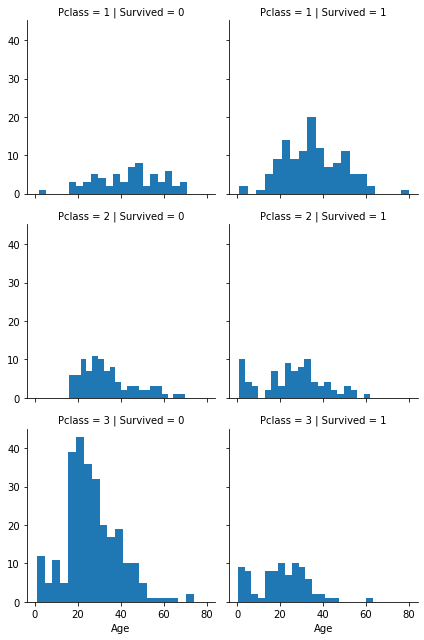

In [430]:
pclass_survival = sns.FacetGrid(train_data, col = "Survived", row = "Pclass")
pclass_survival.map(plt.hist, 'Age', bins = 20)

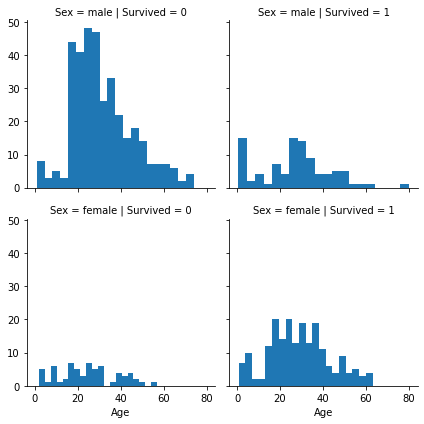

In [431]:
sex_survival = sns.FacetGrid(train_data, col = "Survived", row = "Sex")
sex_survival.map(plt.hist, 'Age', bins = 20)

In [432]:
# 3. Prepare data

# Drop Ticket and Cabin feature as stated earlier
train_data = train_data.drop(['Ticket', 'Cabin'], axis = 1)
test_data = test_data.drop(['Ticket', 'Cabin'], axis = 1)
combine = [train_data, test_data]

# Map Sex feature strings to numerical values
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
    
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [433]:
# Title mapping
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


In [434]:
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

combine = [train_data, test_data]

In [435]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
 9   Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB


In [436]:
# Fill empty age values with median
train_median = int(train_data["Age"].median())
train_data["Age"].fillna(train_median, inplace = True)
test_data["Age"].fillna(train_median, inplace = True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
 8   Title        418 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 29.5+ KB


In [437]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


In [438]:

for dataset in combine:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
    
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1,1,0,7.2500,S,1
1,2,1,1,1,2,1,0,71.2833,C,3
2,3,1,3,1,1,0,0,7.9250,S,2
3,4,1,1,1,2,1,0,53.1000,S,3
4,5,0,3,0,2,0,0,8.0500,S,1


In [439]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna("S")
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1,1,0,7.2500,0,1
1,2,1,1,1,2,1,0,71.2833,1,3
2,3,1,3,1,1,0,0,7.9250,0,2
3,4,1,1,1,2,1,0,53.1000,0,3
4,5,0,3,0,2,0,0,8.0500,0,1


In [440]:
# Fare
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)
train_data.info(), test_data.info()

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 69.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-

In [441]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1,1,0,0,0,1
1,2,1,1,1,2,1,0,3,1,3
2,3,1,3,1,1,0,0,1,0,2
3,4,1,1,1,2,1,0,3,0,3
4,5,0,3,0,2,0,0,1,0,1


In [442]:
# Logistic regression
X_train = train_data.drop(["Survived", "PassengerId"], axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

survival_pred = log_reg.predict(X_test)

def get_rmse(y, pred):
    return np.sqrt(mean_squared_error(y[:len(pred)], pred))



In [443]:
# X_train.head(), X_test.head()
survival_test_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
log_rmse = get_rmse(Y_train, survival_pred)
acc_log, log_rmse

(79.69, 0.7037153622060447)

In [444]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(lin_reg.coef_)

coeff_df.sort_values(by='Correlation', ascending=False)
# pd.Series(lin_reg.coef_), X_train.head()

,Feature,Correlation
1,Age,0.430558
6,Title,0.043214
5,Embarked,0.036083
2,SibSp,-0.003738
4,Fare,-0.031933
3,Parch,-0.055886
0,Sex,-0.114812


In [445]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(Y_train.shape, Y_pred.shape)
svc_rmse = get_rmse(Y_train, Y_pred)
svc_rmse

(891,) (418,)


0.7104820117323276

In [446]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
rfc_rmse = get_rmse(Y_train, Y_pred)

In [447]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
dtc_rmse = get_rmse(Y_train, Y_pred)

In [448]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
sgdc_rmse = get_rmse(Y_train, Y_pred)

In [449]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
perc_rmse = get_rmse(Y_train, Y_pred)

In [450]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
lin_svc_rmse = get_rmse(Y_train, Y_pred)

/Users/kamilstaszewski/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [451]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
gau_rmse = get_rmse(Y_train, Y_pred)

In [452]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
knn_rmse = get_rmse(Y_train, Y_pred)

In [453]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,89.34
8,Decision Tree,89.34
1,KNN,86.31
0,Support Vector Machines,82.04
7,Linear SVC,79.80
2,Logistic Regression,79.69
4,Naive Bayes,78.79
5,Perceptron,78.00
6,Stochastic Gradient Decent,77.55


In [454]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'RMSE': [svc_rmse, knn_rmse, log_rmse, 
              rfc_rmse, gau_rmse, perc_rmse, 
              sgdc_rmse, lin_svc_rmse, dtc_rmse]})
models.sort_values(by='RMSE', ascending=False)

,Model,RMSE
4,Naive Bayes,0.735303
0,Support Vector Machines,0.710482
6,Stochastic Gradient Decent,0.710482
5,Perceptron,0.708796
3,Random Forest,0.707107
7,Linear SVC,0.707107
1,KNN,0.705413
2,Logistic Regression,0.703715
8,Decision Tree,0.702014


In [455]:
# submission = pd.DataFrame({
#         "PassengerId": test_data["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv('./submission.csv', index=False)